
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [1]:

import numpy as np
import matplotlib.pyplot as plt


In [2]:

# Implement StandardScaler manually ,  first read about it, how it works and then implement it
class StandardScalerManual:
    def fit(self, X):
        pass

    def transform(self, X):
        pass

    def fit_transform(self, X):
        pass


In [3]:

# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda
# try to implement L1 regularization or atlease read about it and where it is used
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        pass

    def fit(self, X, y):
        pass

    def predict(self, X):
        pass


Dataset created!
X shape: (250, 2)
y shape: (250,)

Training finished!
Learned w: [17.57243469 -8.57705487]
Learned b: 20.743727412214344
Final MSE: 8.70882550749055


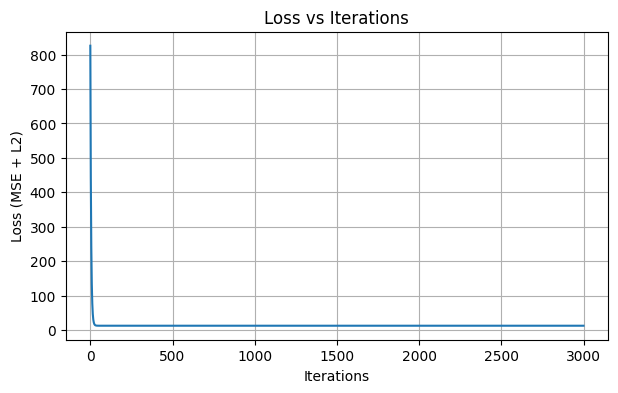

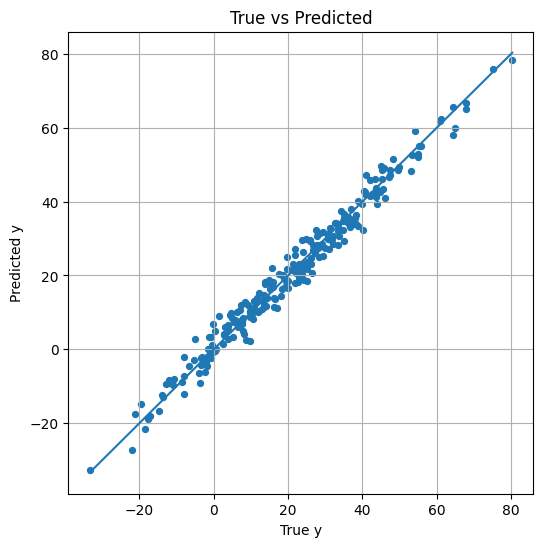

In [7]:
# 1) Synthetic Dataset (X, y)
np.random.seed(42)

n_samples = 250
n_features = 2

# Create features
X = np.random.randn(n_samples, n_features) * 5 + 10  # centered around 10, spread 5

# True parameters (unknown to model)
true_w = np.array([3.5, -1.8])
true_b = 4.0

# Generate target with noise
noise = np.random.randn(n_samples) * 3.0
y = X @ true_w + true_b + noise

print("Dataset created!")
print("X shape:", X.shape)
print("y shape:", y.shape)

# 2) StandardScaler (Manual)
class StandardScalerManual:
    """
    StandardScaler:
    For each feature column:
    z = (x - mean) / std
    """
    def __init__(self, eps=1e-12):
        self.eps = eps
        self.mean_ = None
        self.std_ = None

    def fit(self, X):
        X = np.asarray(X, dtype=float)
        self.mean_ = X.mean(axis=0)
        self.std_ = X.std(axis=0)
        # prevent divide by zero if any feature has zero std
        self.std_ = np.where(self.std_ < self.eps, 1.0, self.std_)
        return self

    def transform(self, X):
        if self.mean_ is None or self.std_ is None:
            raise ValueError("Scaler is not fitted yet. Call fit(X) first.")
        X = np.asarray(X, dtype=float)
        return (X - self.mean_) / self.std_

    def fit_transform(self, X):
        return self.fit(X).transform(X)

# 3) Linear Regression (Manual GD + Ridge L2)
class LinearRegressionManual:
    """
    Model: y_hat = Xw + b

    Loss:
    MSE + Ridge
    L = (1/n)*sum((y_hat - y)^2) + l2_lambda * sum(w^2)

    Note: bias b is NOT regularized.
    """
    def __init__(self, lr=0.01, epochs=2000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.w = None
        self.b = 0.0
        self.loss_history = []

    def fit(self, X, y):
        X = np.asarray(X, dtype=float)
        y = np.asarray(y, dtype=float).reshape(-1)

        n, d = X.shape
        self.w = np.zeros(d, dtype=float)
        self.b = 0.0
        self.loss_history = []

        for ep in range(self.epochs):
            # prediction
            y_hat = X @ self.w + self.b
            err = y_hat - y

            # loss
            mse_loss = (1.0 / n) * np.sum(err ** 2)
            ridge_loss = self.l2_lambda * np.sum(self.w ** 2)  # w only
            loss = mse_loss + ridge_loss
            self.loss_history.append(loss)

            # gradients
            dw = (2.0 / n) * (X.T @ err) + 2.0 * self.l2_lambda * self.w
            db = (2.0 / n) * np.sum(err)

            # update
            self.w -= self.lr * dw
            self.b -= self.lr * db

        return self

    def predict(self, X):
        X = np.asarray(X, dtype=float)
        return X @ self.w + self.b

# 4) Metrics + Plots
def mse(y_true, y_pred):
    y_true = np.asarray(y_true).reshape(-1)
    y_pred = np.asarray(y_pred).reshape(-1)
    return np.mean((y_true - y_pred) ** 2)

def plot_loss(loss_history):
    plt.figure(figsize=(7,4))
    plt.plot(loss_history)
    plt.xlabel("Iterations")
    plt.ylabel("Loss (MSE + L2)")
    plt.title("Loss vs Iterations")
    plt.grid(True)
    plt.show()

def plot_true_vs_pred(y_true, y_pred):
    plt.figure(figsize=(6,6))
    plt.scatter(y_true, y_pred, s=18)
    mn = min(np.min(y_true), np.min(y_pred))
    mx = max(np.max(y_true), np.max(y_pred))
    plt.plot([mn, mx], [mn, mx])  # y=x reference line
    plt.xlabel("True y")
    plt.ylabel("Predicted y")
    plt.title("True vs Predicted")
    plt.grid(True)
    plt.show()

# 5) RUN -> Standardize -> Train -> Predict -> Output -> Plots
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)

lr = 0.05
epochs = 3000
l2_lambda = 0.01   # Ridge strength (L2)

model = LinearRegressionManual(lr=lr, epochs=epochs, l2_lambda=l2_lambda)
model.fit(X_scaled, y)

y_pred = model.predict(X_scaled)

print("\nTraining finished!")
print("Learned w:", model.w)
print("Learned b:", model.b)
print("Final MSE:", mse(y, y_pred))

# plots
plot_loss(model.loss_history)
plot_true_vs_pred(y, y_pred)



## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [10]:

#Implement sigmoid function as told in the lectures
def sigmoid(z):
    pass


In [11]:

#Implement Logistic Regression from scratch and here also add the regularizaation term
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        pass

    def fit(self, X, y):
        pass

    def predict_proba(self, X):
        pass

    def predict(self, X):
        pass


Dataset created!
X shape: (400, 2)
y shape: (400,)
Class balance: [200 200]

Training finished!
Learned w: [1.85770181 1.78129407]
Learned b: 0.006732970544801938
Final Accuracy: 0.9975


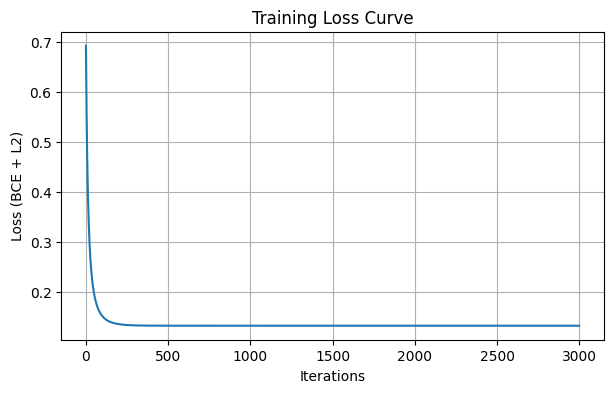

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Synthetic Binary Dataset (X, y)
np.random.seed(42)

n_samples = 400
n_features = 2

# Two Gaussian clusters (class 0 and class 1)
X0 = np.random.randn(n_samples // 2, n_features) + np.array([-2.0, -2.0])
X1 = np.random.randn(n_samples // 2, n_features) + np.array([ 2.0,  2.0])

X = np.vstack([X0, X1])
y = np.hstack([np.zeros(n_samples // 2), np.ones(n_samples // 2)]).astype(int)

# Shuffle dataset
idx = np.random.permutation(n_samples)
X = X[idx]
y = y[idx]

print("Dataset created!")
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Class balance:", np.bincount(y))

# 2) Manual StandardScaler (Reuse from Q1)
class StandardScalerManual:
    def __init__(self, eps=1e-12):
        self.eps = eps
        self.mean_ = None
        self.std_ = None

    def fit(self, X):
        X = np.asarray(X, dtype=float)
        self.mean_ = X.mean(axis=0)
        self.std_ = X.std(axis=0)
        self.std_ = np.where(self.std_ < self.eps, 1.0, self.std_)
        return self

    def transform(self, X):
        if self.mean_ is None or self.std_ is None:
            raise ValueError("Scaler not fitted. Call fit(X) first.")
        X = np.asarray(X, dtype=float)
        return (X - self.mean_) / self.std_

    def fit_transform(self, X):
        return self.fit(X).transform(X)

# 3) Sigmoid
def sigmoid(z):
    # stable sigmoid (avoid overflow)
    z = np.clip(z, -500, 500)
    return 1.0 / (1.0 + np.exp(-z))

# 4) Logistic Regression from Scratch
class LogisticRegressionManual:
    """
    Binary Logistic Regression:
    p = sigmoid(Xw + b)

    Loss = Binary Cross Entropy + L2:
    BCE = -(1/n) * sum( y*log(p) + (1-y)*log(1-p) )
    L2  = l2_lambda * sum(w^2)      (bias NOT regularized)
    """
    def __init__(self, lr=0.1, epochs=2000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda

        self.w = None
        self.b = 0.0
        self.loss_history = []

    def fit(self, X, y):
        X = np.asarray(X, dtype=float)
        y = np.asarray(y, dtype=float).reshape(-1)

        n, d = X.shape
        self.w = np.zeros(d, dtype=float)
        self.b = 0.0
        self.loss_history = []

        for ep in range(self.epochs):
            # forward
            z = X @ self.w + self.b
            p = sigmoid(z)

            # BCE loss
            bce = -np.mean(y * np.log(p + 1e-12) + (1 - y) * np.log(1 - p + 1e-12))
            # L2 loss (only w)
            l2 = self.l2_lambda * np.sum(self.w ** 2)
            loss = bce + l2
            self.loss_history.append(loss)

            # gradients:
            # d/dw BCE = (1/n) X^T (p - y)
            dw = (1.0 / n) * (X.T @ (p - y))
            # add L2 gradient: 2*lambda*w
            dw += 2.0 * self.l2_lambda * self.w

            # d/db BCE = (1/n) sum(p - y)
            db = (1.0 / n) * np.sum(p - y)

            # update
            self.w -= self.lr * dw
            self.b -= self.lr * db

        return self

    def predict_proba(self, X):
        X = np.asarray(X, dtype=float)
        return sigmoid(X @ self.w + self.b)

    def predict(self, X, threshold=0.5):
        proba = self.predict_proba(X)
        return (proba >= threshold).astype(int)

# 5) Accuracy + Plot
def accuracy(y_true, y_pred):
    y_true = np.asarray(y_true).reshape(-1)
    y_pred = np.asarray(y_pred).reshape(-1)
    return np.mean(y_true == y_pred)

def plot_loss(loss_history):
    plt.figure(figsize=(7,4))
    plt.plot(loss_history)
    plt.xlabel("Iterations")
    plt.ylabel("Loss (BCE + L2)")
    plt.title("Training Loss Curve")
    plt.grid(True)
    plt.show()

# 6) RUN -> Standardize -> Train -> Report loss curve + final accuracy
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)

lr = 0.1
epochs = 3000
l2_lambda = 0.01

model = LogisticRegressionManual(lr=lr, epochs=epochs, l2_lambda=l2_lambda)
model.fit(X_scaled, y)

y_pred = model.predict(X_scaled, threshold=0.5)
acc = accuracy(y, y_pred)

print("\nTraining finished!")
print("Learned w:", model.w)
print("Learned b:", model.b)
print("Final Accuracy:", acc)

# plot
plot_loss(model.loss_history)



## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [8]:

# Implement K-Means for matrix elements
#CAN USE SK-LEARN FOR THIS TASK AS THIS TASK WILL HELP US DIRECTLY IN OUR PROJECT !
def kmeans_matrix(M, k, max_iters=100):
    '''
    Returns:
    assignment_table: same shape as M, contains cluster labels
    cookbook: dict -> cluster_id : list of (i, j) positions
    centroids: numpy array of centroid values
    '''
    pass


M shape: (15, 20)
Centroids: [12.8369138  19.16992862  3.09371172  8.16352666]
assignment_table shape: (15, 20)
Cluster sizes: {0: 112, 1: 28, 2: 57, 3: 103}


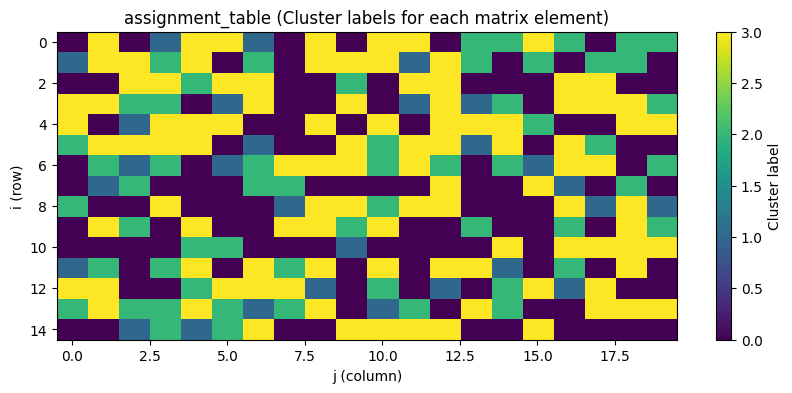

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def kmeans_matrix(M, k, max_iters=100, tol=1e-6, seed=42):
    """
    Implement K-Means for matrix elements (NOT rows).

    Each element M[i, j] is treated as a 1D data point (its numeric value).

    Returns:
        assignment_table: same shape as M, contains cluster labels (0..k-1)
        cookbook: dict -> cluster_id : list of (i, j) positions
        centroids: numpy array of centroid values (shape: (k,))
    """
    np.random.seed(seed)

    M = np.asarray(M, dtype=float)
    n, m = M.shape

    # Flatten all matrix values into 1D "points"
    X = M.reshape(-1)  # shape: (n*m,)

    # Init centroids: pick k random points from X
    if k > X.shape[0]:
        raise ValueError("k cannot be greater than total number of matrix elements.")

    init_idx = np.random.choice(X.shape[0], size=k, replace=False)
    centroids = X[init_idx].copy()  # shape: (k,)

    # K-means iterations
    for _ in range(max_iters):
        # nearest centroid
        # dists shape: (N, k)
        dists = np.abs(X[:, None] - centroids[None, :])
        labels = np.argmin(dists, axis=1)  # shape: (N,)

        # Update step: recompute centroid as mean of assigned points
        new_centroids = centroids.copy()
        for c in range(k):
            pts = X[labels == c]
            if pts.size == 0:
                # empty cluster -> reinitialize randomly
                new_centroids[c] = X[np.random.randint(0, X.shape[0])]
            else:
                new_centroids[c] = pts.mean()

        # Check convergence
        shift = np.max(np.abs(new_centroids - centroids))
        centroids = new_centroids
        if shift < tol:
            break

    # Reshape labels back into matrix shape
    assignment_table = labels.reshape(n, m)

    # Build cookbook: cluster_id -> list of (i, j)
    cookbook = {c: [] for c in range(k)}
    for i in range(n):
        for j in range(m):
            c = int(assignment_table[i, j])
            cookbook[c].append((i, j))

    return assignment_table, cookbook, centroids

np.random.seed(42)
M = np.random.randn(15, 20) * 5 + 10  # random matrix (n,m)
k = 4

assignment_table, cookbook, centroids = kmeans_matrix(M, k, max_iters=200)

print("M shape:", M.shape)
print("Centroids:", centroids)
print("assignment_table shape:", assignment_table.shape)
print("Cluster sizes:", {c: len(cookbook[c]) for c in cookbook})

# visualization
plt.figure(figsize=(10,4))
plt.imshow(assignment_table, aspect="auto")
plt.title("assignment_table (Cluster labels for each matrix element)")
plt.xlabel("j (column)")
plt.ylabel("i (row)")
plt.colorbar(label="Cluster label")
plt.show()



## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
